El primer paso tiene como objetivo reducir el volumen de datos manteniendo representatividad y diversidad de ataques, para hacer viable el análisis y modelos sin perder valor técnico. Tenemos 10 ficheros CSV que corresponden a los 10 días que duró el experimento llevado a cabo por CIC junto con CSE. Por este motivo, aunque los eventos registrados buscan acercarse lo máximo posible a la realidad, cada día se detectan ataques diferentes, por lo que en cada CSV aparecen eventos benignos o alguno de los ataques planificados para ese día.

In [24]:
import os
import pandas as pd

# Ruta de la carpeta con los CSV
ruta_datasets = "datasets"

# Lista de archivos
archivos_csv = [f for f in os.listdir(ruta_datasets) if f.endswith(".csv")]

# Crear un DataFrame vacío para juntar las muestras
muestra_combinada = pd.DataFrame()

# Por cada archivo, cargar solo una muestra de filas (ajustable)
for archivo in archivos_csv:
    ruta_archivo = os.path.join(ruta_datasets, archivo)
    print(f"Cargando muestra de: {archivo}")
    try:
        df = pd.read_csv(ruta_archivo, nrows=10000)  # Carga solo 10.000 filas de cada archivo
        df["source_file"] = archivo  # Añadir columna para rastrear origen
        muestra_combinada = pd.concat([muestra_combinada, df], ignore_index=True)
    except Exception as e:
        print(f"Error al leer {archivo}: {e}")


Cargando muestra de: 02-14-2018.csv
Cargando muestra de: 02-15-2018.csv
Cargando muestra de: 02-16-2018.csv
Cargando muestra de: 02-20-2018.csv
Cargando muestra de: 02-21-2018.csv
Cargando muestra de: 02-22-2018.csv
Cargando muestra de: 02-23-2018.csv
Cargando muestra de: 02-28-2018.csv
Cargando muestra de: 03-01-2018.csv


C:\Users\lcgsa\AppData\Local\Temp\ipykernel_1432\3751973395.py:18: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo, nrows=10000)  # Carga solo 10.000 filas de cada archivo


Cargando muestra de: 03-02-2018.csv


In [30]:
muestra_combinada.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Idle Mean,Idle Std,Idle Max,Idle Min,Label,source_file,Flow ID,Src IP,Src Port,Dst IP
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,56320859.5,139.300036,56320958.0,56320761.0,Benign,02-14-2018.csv,NaN,NaN,NaN,NaN
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,56320733.0,114.551299,56320814.0,56320652.0,Benign,02-14-2018.csv,NaN,NaN,NaN,NaN
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,56319311.5,301.934596,56319525.0,56319098.0,Benign,02-14-2018.csv,NaN,NaN,NaN,NaN
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,0.0,0.0,0.0,0.0,Benign,02-14-2018.csv,NaN,NaN,NaN,NaN
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,0.0,0.0,0.0,0.0,Benign,02-14-2018.csv,NaN,NaN,NaN,NaN


C:\Users\lcgsa\AppData\Local\Temp\ipykernel_1432\2203321540.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cantidad_clases.index, y=cantidad_clases.values, palette="viridis")


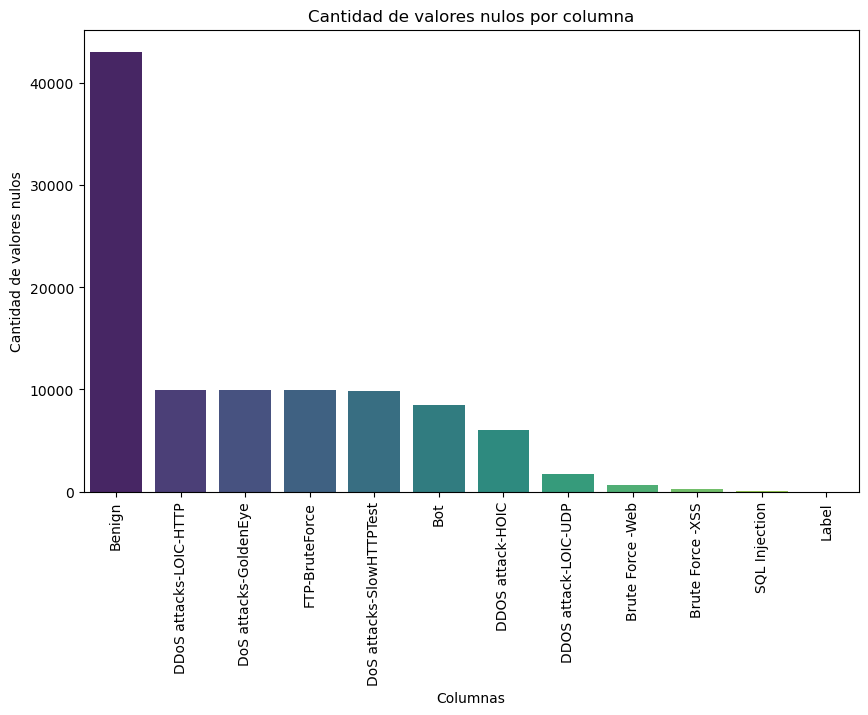

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar los valores nulos por columna
cantidad_clases = muestra_combinada['Label'].value_counts()

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=cantidad_clases.index, y=cantidad_clases.values, palette="viridis")
plt.xticks(rotation=90)  # Rota las etiquetas del eje X para que sean legibles
plt.title('Cantidad de valores nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.show()

In [26]:
print(muestra_combinada['Label'].value_counts())

Label
Benign                      43083
DDoS attacks-LOIC-HTTP       9934
DoS attacks-GoldenEye        9931
FTP-BruteForce               9904
DoS attacks-SlowHTTPTest     9899
Bot                          8520
DDOS attack-HOIC             6070
DDOS attack-LOIC-UDP         1730
Brute Force -Web              611
Brute Force -XSS              230
SQL Injection                  87
Label                           1
Name: count, dtype: int64


C:\Users\lcgsa\AppData\Local\Temp\ipykernel_1432\1928432035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valores_nulos.index, y=valores_nulos.values, palette="viridis")


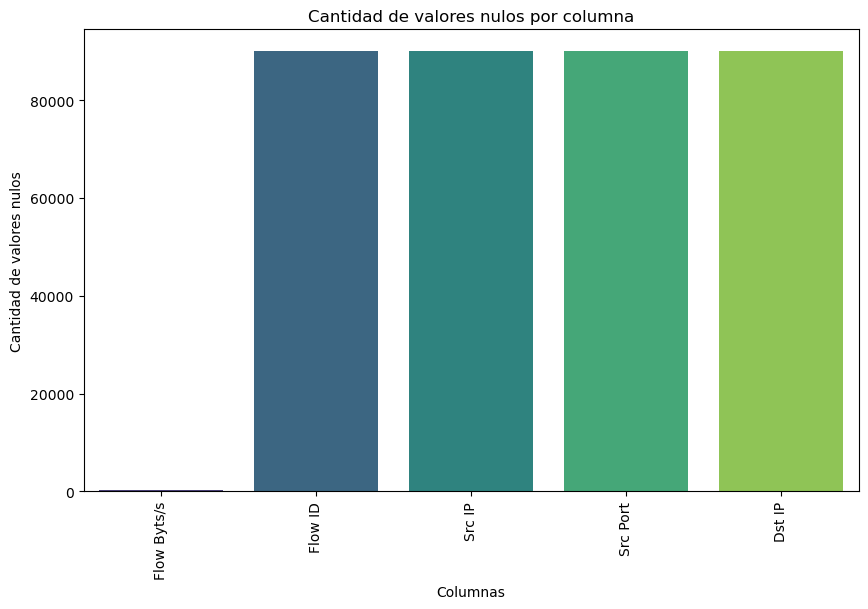

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar los valores nulos por columna
valores_nulos = muestra_combinada.isnull().sum()

# Filtrar para columnas con al menos un valor nulo
valores_nulos = valores_nulos[valores_nulos > 0]

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=valores_nulos.index, y=valores_nulos.values, palette="viridis")
plt.xticks(rotation=90)  # Rota las etiquetas del eje X para que sean legibles
plt.title('Cantidad de valores nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.show()


In [42]:
print(valores_nulos)

Flow Byts/s      352
Flow ID        90000
Src IP         90000
Src Port       90000
Dst IP         90000
dtype: int64


C:\Users\lcgsa\AppData\Local\Temp\ipykernel_1432\3758787008.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipos_datos.index, y=tipos_datos.values, palette="Set2")


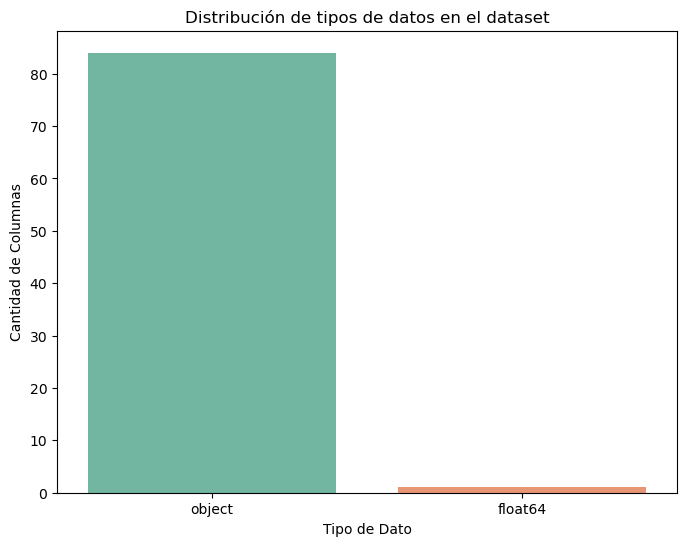

In [56]:
# Contar la cantidad de columnas por tipo de datos
tipos_datos = muestra_combinada.dtypes.value_counts()

# Crear el gráfico
plt.figure(figsize=(8, 6))
sns.barplot(x=tipos_datos.index, y=tipos_datos.values, palette="Set2")
plt.title('Distribución de tipos de datos en el dataset')
plt.xlabel('Tipo de Dato')
plt.ylabel('Cantidad de Columnas')
plt.show()

In [58]:
print(tipos_datos)

object     84
float64     1
Name: count, dtype: int64


In [48]:
columnas_criticas = ['Flow ID', 'Src IP', 'Src Port', 'Dst IP']
muestra_limpia = muestra_combinada.dropna(subset=columnas_criticas).copy()  # <- Copia explícita

# Convertir 'Flow Byts/s' a numérico
muestra_limpia['Flow Byts/s'] = pd.to_numeric(muestra_limpia['Flow Byts/s'], errors='coerce')

# Rellenar los valores nulos con la media
muestra_limpia['Flow Byts/s'] = muestra_limpia['Flow Byts/s'].fillna(muestra_limpia['Flow Byts/s'].mean())

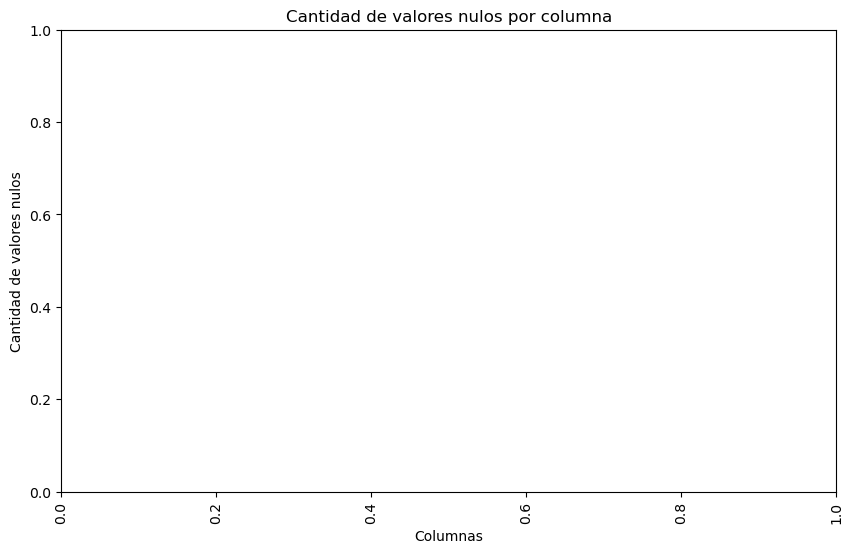

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar los valores nulos por columna
valores_nulos = muestra_limpia.isnull().sum()

# Filtrar para columnas con al menos un valor nulo
valores_nulos = valores_nulos[valores_nulos > 0]

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=valores_nulos.index, y=valores_nulos.values, palette="viridis")
plt.xticks(rotation=90)  # Rota las etiquetas del eje X para que sean legibles
plt.title('Cantidad de valores nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.show()

C:\Users\lcgsa\AppData\Local\Temp\ipykernel_1432\3884472143.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipos_datos.index, y=tipos_datos.values, palette="Set2")


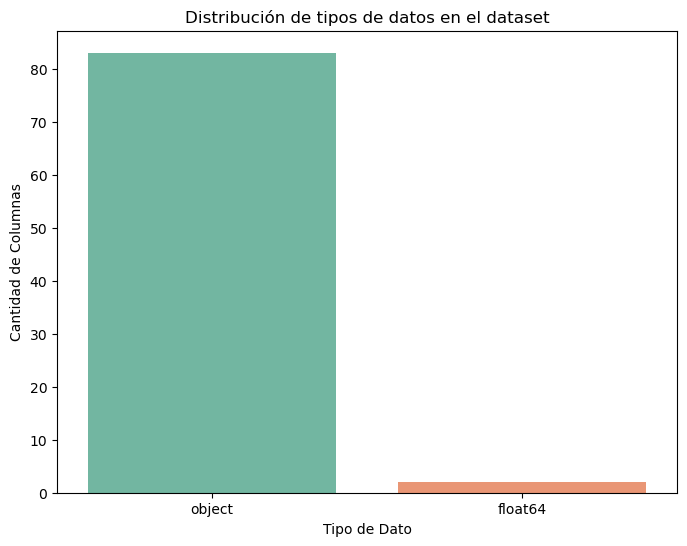

In [60]:
# Contar la cantidad de columnas por tipo de datos
tipos_datos = muestra_limpia.dtypes.value_counts()

# Crear el gráfico
plt.figure(figsize=(8, 6))
sns.barplot(x=tipos_datos.index, y=tipos_datos.values, palette="Set2")
plt.title('Distribución de tipos de datos en el dataset')
plt.xlabel('Tipo de Dato')
plt.ylabel('Cantidad de Columnas')
plt.show()

In [62]:
print(tipos_datos)

object     83
float64     2
Name: count, dtype: int64


In [68]:
print(muestra_combinada.shape)
print(muestra_limpia.shape)

(100000, 85)
(10000, 85)


In [70]:
print(muestra_limpia['Label'].value_counts())

Label
DDoS attacks-LOIC-HTTP    9934
Benign                      66
Name: count, dtype: int64


Esto quiere decir que he reducido significativamente el número de filas de mi dataset, que es lo que buscamos al eliminar las filas donde alguno de los valores es NA, aunque ha tenido un efecto secundario no muy favorable donde el número de ataques a predecir se ha reducido significativamente. Esto no es lo que buscamos, queremos conservar la variedad (todas las categorías) y no desbalancear el conjunto de datos.

Dejar el dataset con las dimensiones originales no es una opción, tanto por el uso de recursos que necesita como por problemas posteriores relacionado con los modelos de Machine Learning, ya que crear una red neuronal con esta cantidad de datos no es viable en mi caso.

Primero de todo, tras haber realizado un análisis rápido, vamos a eliminar esta fila potencialmente errónea que vemos cuando listamos la cantidad de filas que corresponde a cada categoría. Concretamente hablamos de la fila donde Label tiene como valor label, que no corresponde a un ataque real. Si observamos su contenido veremos que sirve para dar nombre a las filas del dataset, pero no es necesaria.

In [77]:
muestra_combinada[muestra_combinada['Label'] == 'Label']

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,source_file,Flow ID,Src IP,Src Port,Dst IP
413,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,03-01-2018.csv,NaN,NaN,NaN,NaN


In [80]:
muestra_combinada = muestra_combinada[muestra_combinada['Label'] != 'Label']

# Muestreo

Para hacer el muestreo de datos, la opción más estratégica será conservar las clases minoritarias para mantener la variabilidad y eliminar de las clases mayoritarias algunos registros, concretamente de los datos que contengan datos faltantes para asegurarnos que mantenemos la mayor cantidad de información posible.

In [85]:
import pandas as pd

df = muestra_combinada.copy()

print("Distribución de clases original:")
print(df['Label'].value_counts())

# Definir umbral para separar clases minoritarias
umbral_minoria = 2000  # Pendiente de decidir el valor ajustado
conteo_clases = df['Label'].value_counts()

clases_minoritaria = conteo_clases[conteo_clases < umbral_minoria].index.tolist()
clases_mayoritaria = conteo_clases[conteo_clases >= umbral_minoria].index.tolist()

# Conservar todas las clases minoritarias
df_minoritaria = df[df['Label'].isin(clases_minoritaria)]

# Reducir clases mayoritarias conservando calidad (menos nulos)
muestras_filtradas = []

n_muestra = 3000 # Cantidad de registros por clase mayoritaria; pendiente cambiar este valor

for clase in clases_mayoritaria:
    subset = df[df['Label'] == clase]
    subset = subset.copy() # para evitar los warnings
    subset['null_count'] = subset.isnull().sum(axis=1)
    subset = subset.sort_values('null_count').drop(columns='null_count').head(n_muestra)
    muestras_filtradas.append(subset)

df_muestreado = pd.concat([df_minoritaria] + muestras_filtradas, ignore_index=True)

print("\nDistribución de clases tras el muestreo:")
print(df_muestreado['Label'].value_counts())
print(f"\nDimensiones finales del dataset: {df_muestreado.shape}")

Distribución de clases original:
Label
Benign                      43083
DDoS attacks-LOIC-HTTP       9934
DoS attacks-GoldenEye        9931
FTP-BruteForce               9904
DoS attacks-SlowHTTPTest     9899
Bot                          8520
DDOS attack-HOIC             6070
DDOS attack-LOIC-UDP         1730
Brute Force -Web              611
Brute Force -XSS              230
SQL Injection                  87
Name: count, dtype: int64

Distribución de clases tras el muestreo:
Label
Benign                      3000
DDoS attacks-LOIC-HTTP      3000
DoS attacks-GoldenEye       3000
FTP-BruteForce              3000
DoS attacks-SlowHTTPTest    3000
Bot                         3000
DDOS attack-HOIC            3000
DDOS attack-LOIC-UDP        1730
Brute Force -Web             611
Brute Force -XSS             230
SQL Injection                 87
Name: count, dtype: int64

Dimensiones finales del dataset: (23658, 85)
